In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import qiskit as qkit
import qiskit.visualization as qvis

/home/jam/Local/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/quantum_info/operators/pauli.py:107: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
/home/jam/Local/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/quantum_info/operators/pauli.py:108: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [3]:
import qiskit.providers.aer.noise as qnoise

In [4]:
# load account
provider = qkit.IBMQ.load_account()

/home/jam/Local/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


/home/jam/Local/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/home/jam/Local/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `

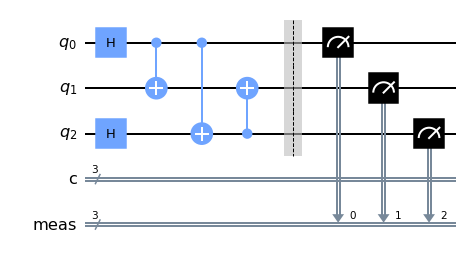

In [5]:
# prepare a qucntum circuit
qcirc = qkit.QuantumCircuit(3,3)

# add Hadamard gates
qcirc.h([0,2])

# add CNOTs
qcirc.cx(0,1)
qcirc.cx(0,2)
qcirc.cx(2,1)

# final measurement
qcirc.measure_all()

# see what is happening
qcirc.draw(output='mpl')

In [6]:
# use hardware backend for errors
hardware = provider.get_backend('ibmq_santiago')
# use simulator for calculations
simulator = qkit.Aer.get_backend('qasm_simulator')

In [11]:
# read the noise model
noise_model = qnoise.NoiseModel.from_backend(hardware)
print(noise_model.to_dict())


TypeError: unsupported operand type(s) for *: 'int' and 'dict'

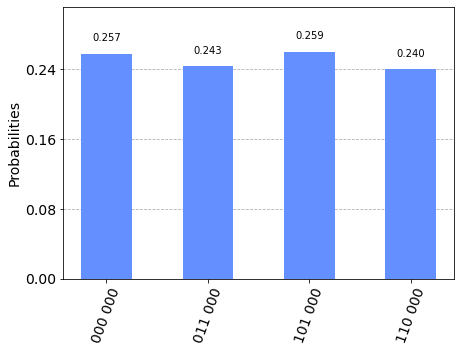

In [53]:
# run the curcuit
result = qkit.execute(qcirc, 
                      hardware, 
                      noise_model = None, 
                      shots=2048).result()
counts = result.get_counts(0)
qvis.plot_histogram(counts)

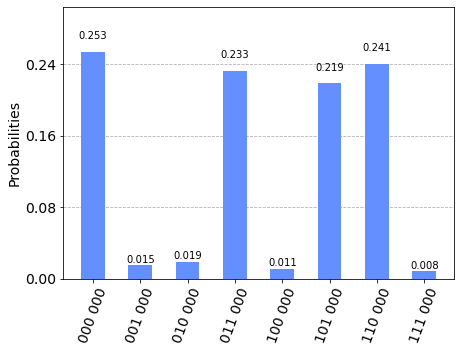

In [54]:
# run the curcuit
result = qkit.execute(qcirc, 
                      simulator, 
                      noise_model = noise_model, 
                      coupling_map = hardware.configuration().coupling_map, shots=2048).result()
counts = result.get_counts(0)
qvis.plot_histogram(counts)